# Veri Yogun Uygulamalar Modul Projesi: Zaman serisi siniflandirma problemi

Dr. Ismail Guzel

Milli Teknoloji Hamlesi altinda Yapay Zeka Uzmanlık Programı kapsamında 18 saatlik Veri Yogun Uygulamar egitimi sonunda bu projenin tamamlanmasi beklenilmektedir. 

Bu proje icerisinde amac farkli sektorlerden elde dilmis zaman serileri uzerinden elde edilen faktorler uzerine kurulmus bir classification modeli kurarak benzerlik calismasi yapmaktir.

Mesela ilgilenilen bir hisse senedi X olsun, bunun bulundugu sektor bazli diger hisse senetlerin davranislarindan farkli davrandigini dusunelim. Yani sektor icinde bir artis gozlemlenirken bu hisse senetinde bir hareketlilik olmasin. Dolayisiyla, hangi sektore daha cok benziyor sorusuna cevap verebilirsek, o sektor'un hareketlerine gore bir hipotez kurabiliriz.

Bu proje, asagidaki surecleri kapsayacak:

- Sektorleriin listesine bir web-scraping ile erisilmesi ve verilerin elde edilmesi (`yfinance`, `investpy`, [`quandl`]((https://docs.data.nasdaq.com/v1.0/docs/python-installation)))
- 2005-01-01 yilindan itibaren aylik getirelerden olusan serilerin elde edilmesi
- 3 buyuk sektor uzerinden getirilerin faktorleri(momentum gibi) hesaplanmasi
- Bu momentum serileri uzerinden bir tsfresh ile feature engineering yapilmasi (imputing, encoding, transformation, ve daha fazlasi)
- Yeni elde edilmis feature ve sektor siniflari uzerinden bir model kurulmasi (en iyi model secmesi)
- Diger sektorlerden ornekler alip ayni feature engine yontemleri yaptik sonra hangi sektore benzedigine karar vermek.
- **Bonus** Mesela Real-Estate sektorunde bulunan butun sembollerin tahmini edildikten sonra cogunluk hangi sektore(T,F,H) benzedigi bilgisine erismek.

## İsim-Soyisim: Muhammet Ali Şentürk
### E-posta: senturkmali7319@gmail.com


### Bu proje aslında üzerine kafa yorulması gereken uzun soluklu bir proje. Bu hafta içerisinde bu imkanı bulamadığım için gerekli düzeyde zaman ayıramadım. Ancak problemi kafamda canlandırabildim ve yaptıklarımın yanında daha iyi sonuçlar alabilmek için düşündüğüm gerekli adımları belirteyim:
* Öncelikle ne kadar sembol o kadar iyi. tsfeatures ile özellik çıkarmak çok uzun sürdüğü için sadece ilk 200 sembolü çekip kullandım. Bunları tsfeatures e verdiğim zaman 700 den fazla özellik dönüyor. Bütün bunları technology, finance ve healthcare de uygulayıp sonucu bir csv ye kaydettim. Devamında bu üçünü tek bir dataframe de birleştirip karıştırmak(shuffle) gerekli. Aksi takdirde sadece tek bir sektörü test verisi olarak kullanmış oluruz, üstelik eğitim verisinde hiç bulunmadığı halde.
* Bu özelliklerin boş olan yerleri sütun halinde boş olduğu için direkt olarak sildim. Impute etme metodunu uygulamak için bu problemde bir yer bulamadım. Sadece momentum hesabında boşta kalan verileri öncesi ve sonrası ile doldurdum.
* İlk aşamada özellik seçimi için PCA kullanmayı düşündüm. 40 bileşen seçerek %100 varyans koruması sağladım. Yani 40 bileşen, 700 civarı değişkenin taşıdığı varyansı sağlıyor. 700 den 40 a düşmesi önemliydi. Ancak bu bileşenlerin her sektör için aynı şeyi ifade ettiğinden şüphelendim. Yaptığım testlerde de bu şüphemde haklı olduğumu gördüm. Eğittiğim modelin performansı oldukça düşüktü. Bu yüzden farklı bir metot tercih ettim.
* Tsfresh kütüphanesinin select_features metodunu kullanarak özellik seçimini gerçekleştirdim. Hemen ardından tekrar eden ve %70 i aynı olan sütunları sildim. Ancak halen daha çok sayıda özellik vardı. O yüzden mutual information kullanarak yüksek skorlu ilk 20 özelliği seçtim. 
* Aykırı değer yakalama kısmında ise sadece tek bir özelliğe bakarak aykırı değer tespiti yapmak doğru olmaz. Çünkü o özelliğin gerçekten de öyle bir değere sahip olabileceğini göz önüne almalıyız. Bu yüzden aykırı değer tespiti aslında multimodal yani hedef değişkeni dışında diğer tüm değişkenleri bir set olarak alıp tespit etmek gerekir. Bunun için de mahalanobis adlı bir metodu kullandım. 39 adet aykırı gözlem tespit ettim ve onları çıkardım.
* Devamında verideki değerleri eğitim ve teste bölüp standardize ettim. Eğitim verisinde fit edip eğitim ve testte transform ettim. Böyle olmadığı zaman, görülmemiş veriye göre standardize etmiş oluruz ve bu aşama anlamını yitirir.
* Özellik değerini (feature importance) tespit etmek adına custom bir yöntem kullandım. Halihazırda eğitilen bir modeli, verideki kıymetini ölçmek istediğimiz bir özelliğin değerlerini rastgele karıştırarak tekrar eğittim. Bu işlemin öncesi ve sonrası arasındaki f1 skoru farkını aldım. Bu işlem sonucunda modelin performansındaki düşüş oranına göre o özelliğin değerini görmüş oluruz.
* Örnek bir SVM sınıflandırma modelini eğitip tahminlemesini sağlasım. Sonrasında bu modelin hiper parametrelerini en optimal değerlerle tekrardan eğittim. Ancak bu adım modelin performansını daha da düşürdü. Random Forest ve XGBoost denediğimde de aynı şeyi yaşadım. Daha önceki tecrübelerime dayanarak söyleyebilirim ki; kaliteli bir veri > iyi bir makine öğrenmesi modeli. Bu aşamada bunu tekrardan doğrulamış oldum. Verinin iyi analiz edilmesi ve hazırlanması, hiperparametrelerin optimize edilmesinden daha faydalı.
* Son olarak da diğer sektörlerden rastgele seçilen sembolleri, eğittimiz modele vererek hangi sektöre daha çok benzediğini tahminlemesini istedim. Örnek olarak Real-Estate teki sembolleri verdim. Tahminlerin büyük bir çoğunluğu Technology den yanaydı. Bu da demek oluyor ki, oluşturduğum modele göre Real-Estate şirketlerinin 2005 ten bu yana aylık bazda kapanış değerlerinin momentumları Technology şirketlerine oldukça benziyor. 

In [1]:
#!pip install yfinance
#!pip install tsfresh
#!pip install feature_engine
NUMBER_OF_SYMBOLS = 200   # Her bir sektörden çektiğim şirket saysıı (performans kazanmak için yapmak durumunda kaldım)

In [45]:
import yfinance
import tsfresh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import scipy as sp
import copy

from scipy.stats import chi2
from sklearn.covariance import MinCovDet
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tsfresh import select_features
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
from bs4 import BeautifulSoup

In [3]:
def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

In [4]:
sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

In [5]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1384,"9,690.02B",2.41%,14.71,17.75%,0.53%,11.62%
1,Healthcare,1216,"8,168.58B",0.43%,50.88,4.08%,1.31%,7.53%
2,Technology,788,17.73T,0.43%,44.90,13.16%,0.27%,14.87%
3,Industrials,651,"5,479.34B",1.11%,26.72,7.32%,0.55%,17.68%
4,Consumer Discretionary,577,"7,266.99B",0.65%,27.34,5.95%,0.31%,2.23%
5,Real Estate,264,"1,506.48B",4.13%,50.71,8.89%,-0.13%,6.92%
6,Materials,263,"2,069.74B",1.56%,19.61,8.68%,0.46%,2.26%
7,Communication Services,260,"5,361.33B",1.09%,28.01,10.40%,0.30%,2.10%
8,Energy,253,"3,645.46B",2.85%,8.01,12.42%,0.43%,18.22%
9,Consumer Staples,241,"4,035.65B",1.45%,29.74,4.72%,0.45%,12.15%


Burayı localde tekrar tekrar indirmemek için yoruma aldım

In [6]:
# fetch_data(sectors='energy').to_csv('data/energy.csv')
# fetch_data(sectors='financials').to_csv('data/financials.csv')
# fetch_data(sectors='healthcare').to_csv('data/healthcare.csv')
# fetch_data(sectors='technology').to_csv('data/technology.csv')
# fetch_data(sectors='utilities').to_csv('data/utilities.csv')
# fetch_data(sectors='real-estate').to_csv('data/real-estate.csv')
# fetch_data(sectors='materials').to_csv('data/materials.csv')
# fetch_data(sectors='industrials').to_csv('data/industrials.csv')
# fetch_data(sectors='consumer-staples').to_csv('data/consumer-staples.csv')
# fetch_data(sectors='consumer-discretionary').to_csv('data/consumer-discretionary.csv')
# fetch_data(sectors='communication-services').to_csv('data/communication-services.csv')

Technology, Financials ve Healthcare verilerinin sembollerini gösterdim.

In [7]:
technology = pd.read_csv('data/technology.csv')
technology.Symbol

0      MSFT
1      AAPL
2      NVDA
3       TSM
4      AVGO
       ... 
782    MYSZ
783    SYTA
784    XTKG
785    ASTI
786    BCAN
Name: Symbol, Length: 787, dtype: object

In [8]:
finance = pd.read_csv('data/financials.csv')
finance.Symbol

0      BRK.B
1          V
2        JPM
3         MA
4        BAC
       ...  
993     NCPL
994     RELI
995     TIRX
996      DXF
997    AIMAU
Name: Symbol, Length: 998, dtype: object

In [9]:
healthcare = pd.read_csv('data/healthcare.csv')
healthcare.Symbol

0        LLY
1        NVO
2        UNH
3        JNJ
4       ABBV
        ... 
1212    SXTC
1213    MOTS
1214     NBY
1215     GRI
1216    RNAZ
Name: Symbol, Length: 1217, dtype: object

* Technology verisi için değeri nan olmayan sembolleri yfinance ten çektim
* Zaman serisi olduğu için, boşta kalan değerleri önceki ve sonraki değerleriyle doldurdum

In [10]:
def get_ticker_data(data):
    
    ticker_list=[ticker for ticker in list(data.Symbol.values) if ticker is not np.nan][:NUMBER_OF_SYMBOLS]  
    data = yfinance.download(ticker_list, start='2005-01-01') 
    data_close=data['Close'].resample('M').last().pct_change()+1 
    
    data_close.ffill(inplace=True)
    data_close.bfill(inplace=True)
    data_nn = data_close.dropna(axis=1)
    
    return data_nn

In [11]:
# tick_t = get_ticker_data(technology)
# tick_f = get_ticker_data(finance)
# tick_h = get_ticker_data(healthcare)

Örnek momentum hesabınızı kullandım

In [12]:
# 3 aylik momentum faktorleri
def get_rolling_ret(data, n): 
    return data.rolling(n).apply(np.prod)

In [13]:
# tech_roll = get_rolling_ret(tick_t, 3).dropna()
# fncl_roll = get_rolling_ret(tick_f, 3).dropna()
# hcre_roll = get_rolling_ret(tick_h, 3).dropna()

Bu fonksiyonda:
* Momentum verisindeki tarih değişkenini index olmaktan çıkarıp sütun olarak ekledim
* Semboller teknoloji sektörüne ait olduğu için onları kaldırıp yerlerine "Technology" yazdım
* tsfresh kullanarak yeni özellikler çıkardım
* Bu adımları her sembole özel yaptığım için devamında bunları append kullanarak birleştirdim

In [14]:
def get_features(data, sector):
    
    df_sector = pd.DataFrame()
    for symbol in data.columns[:NUMBER_OF_SYMBOLS]:
        new_df = pd.DataFrame(data[symbol]).reset_index()
        new_df["Sector"] = sector
        new_df.columns = ["Date", "Close", "Sector"]
        df_features = tsfresh.extract_features(new_df, column_id='Sector', column_sort="Date", 
                                           default_fc_parameters=tsfresh.feature_extraction.ComprehensiveFCParameters())
        df_sector = df_sector.append(df_features)
        
    return df_sector.dropna(axis=1).reset_index().rename(columns={'index': "Sector"})

In [15]:
# tech_ft = get_features(tech_roll, "Technology")
# fncl_ft = get_features(fncl_roll, "Financial")
# hcre_ft = get_features(hcre_roll, "Healthcare")

In [16]:
# tech_ft.to_csv("tech_ft.csv")
# fncl_ft.to_csv("fncl_ft.csv")
# hcre_ft.to_csv("hcre_ft.csv")

Yukarıdaki aşamalar zaman aldığı için, çıkarılan özellikleri csv olarak kaydedip yükledim.

In [17]:
tech_ft = pd.read_csv("tech_ft.csv")
fncl_ft = pd.read_csv("fncl_ft.csv")
hcre_ft = pd.read_csv("hcre_ft.csv")

Bu üç sektöre ait verileri tek bir dataframe de birleştirip karıştırdım.

In [18]:
full_ft = pd.concat([tech_ft, fncl_ft, hcre_ft]).iloc[:,1:].sample(frac=1, random_state=0)
full_ft

,Sector,Close__variance_larger_than_standard_deviation,Close__has_duplicate_max,Close__has_duplicate_min,Close__has_duplicate,Close__sum_values,Close__abs_energy,Close__mean_abs_change,Close__mean_change,Close__mean_second_derivative_central,...,Close__fourier_entropy__bins_3,Close__fourier_entropy__bins_5,Close__fourier_entropy__bins_10,Close__fourier_entropy__bins_100,Close__permutation_entropy__dimension_3__tau_1,Close__permutation_entropy__dimension_4__tau_1,Close__permutation_entropy__dimension_5__tau_1,Close__permutation_entropy__dimension_6__tau_1,Close__permutation_entropy__dimension_7__tau_1,Close__mean_n_absolute_max__number_of_maxima_7
7,Healthcare,0.0,0.0,0.0,0.0,247.217424,282.337113,0.156093,0.002269,-0.001343,...,0.228375,0.446721,0.889494,2.521551,1.696178,2.888001,3.974217,4.835996,5.211289,1.755937
132,Technology,0.0,1.0,0.0,1.0,380.732760,636.483549,0.009163,-0.001844,-0.000251,...,0.099760,0.099760,0.099760,0.099760,0.227204,0.283101,0.312461,0.342020,0.343306,1.690244
11,Financial,0.0,0.0,0.0,1.0,238.229008,251.590796,0.051799,0.000086,-0.000415,...,0.470236,0.834155,1.176005,2.903149,1.324602,2.100789,2.786439,3.141587,3.266467,1.402565
43,Financial,0.0,0.0,0.0,0.0,235.221106,243.360873,0.059977,0.000701,0.000047,...,0.393211,0.665744,1.253829,3.111730,1.757603,3.003890,4.158946,4.963595,5.307707,1.224358
85,Technology,0.0,0.0,1.0,1.0,101.812275,52.161267,0.016935,0.003216,-0.000212,...,0.087705,0.099760,0.099760,0.099760,0.348231,0.483574,0.575854,0.646688,0.655318,1.127640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Financial,0.0,0.0,0.0,0.0,229.842265,234.543066,0.085742,0.000154,-0.000380,...,0.323707,0.597312,1.099831,2.875266,1.730860,2.959866,4.136524,4.923307,5.320140,1.339408
9,Technology,0.0,0.0,0.0,1.0,268.022272,317.382934,0.042846,-0.001229,-0.000518,...,0.049918,0.137470,0.287527,1.703569,0.986911,1.448600,1.775955,1.950524,2.051295,1.408171
159,Financial,0.0,0.0,0.0,0.0,234.846912,244.799873,0.079444,0.000537,0.000029,...,0.487806,0.757014,1.172640,2.806433,1.712357,2.926426,4.030613,4.815921,5.253281,1.329113
192,Technology,0.0,0.0,0.0,0.0,240.826381,261.775720,0.121945,0.001405,-0.000154,...,0.228375,0.377469,0.835150,2.514306,1.695898,2.843668,3.871677,4.680197,5.108034,1.581022


In [19]:
X = full_ft.drop(["Sector"], axis=1)
y = full_ft["Sector"]

select_features ile özellik sayısını 778 den 339 a kadar düşürdüm.

In [20]:
filtered_features = select_features(X, y)
filtered_features

,"Close__fft_coefficient__attr_""real""__coeff_51","Close__fft_coefficient__attr_""imag""__coeff_15","Close__fft_coefficient__attr_""imag""__coeff_8","Close__fft_coefficient__attr_""angle""__coeff_44","Close__fft_coefficient__attr_""angle""__coeff_16","Close__fft_coefficient__attr_""angle""__coeff_15","Close__fft_coefficient__attr_""real""__coeff_44","Close__fft_coefficient__attr_""abs""__coeff_34","Close__fft_coefficient__attr_""angle""__coeff_71","Close__fft_coefficient__attr_""imag""__coeff_41",...,"Close__fft_coefficient__attr_""real""__coeff_17",Close__ar_coefficient__coeff_0__k_10,Close__median,"Close__fft_coefficient__attr_""angle""__coeff_91","Close__fft_coefficient__attr_""imag""__coeff_57","Close__fft_coefficient__attr_""real""__coeff_49","Close__fft_coefficient__attr_""real""__coeff_12","Close__fft_coefficient__attr_""imag""__coeff_88",Close__autocorrelation__lag_4,Close__large_standard_deviation__r_0.2
7,0.426241,-0.597177,8.976692,-152.049636,23.540255,-171.787618,-3.353260,6.010294,-33.592488,1.505698,...,4.096514,0.412239,1.085297,39.988709,0.959576,0.030822,0.164534,-0.465215,-0.034600,0.0
132,0.617505,-1.004084,-4.918348,-119.177925,-14.727122,-24.724401,-0.530879,0.519058,-22.217375,-0.377057,...,1.680889,0.316592,1.690244,-22.659086,0.014555,0.443237,2.009139,-0.005091,0.684663,0.0
11,0.877127,-1.578258,4.068852,-123.120038,-24.599353,-47.109820,-1.784200,0.414031,30.348801,1.060149,...,3.021595,0.328488,1.057679,41.688335,-0.930576,0.330898,3.689458,-0.218192,0.180292,0.0
43,1.437661,-0.923911,1.444882,-111.324913,75.343475,-160.038771,-0.778962,0.543737,148.113553,2.511773,...,1.295115,0.514787,1.034815,-25.588639,-0.044706,-1.292291,1.859180,-0.587193,-0.069879,0.0
85,-0.810327,1.882055,1.755743,-141.265420,83.683537,77.607810,-0.979689,1.087391,130.581176,0.728894,...,0.190151,-0.026367,0.387803,169.678723,-0.274742,0.160045,1.280585,0.301124,0.757005,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.949516,-0.816382,1.327685,-105.215995,41.709609,-161.437763,-0.612654,1.404757,117.557075,2.268792,...,2.402771,0.485718,0.993405,-9.746640,-0.380054,-0.276865,5.088554,-0.227040,-0.125333,0.0
9,0.499983,-2.501035,1.274920,-85.895305,4.153688,-49.240126,0.220505,2.149798,7.822488,0.713864,...,1.104259,0.144728,1.219330,50.375848,0.649461,0.572116,0.916510,0.085549,0.286163,0.0
159,0.018519,-1.742259,-1.791502,-10.463310,116.293257,-122.103441,1.045990,2.908261,60.356917,1.772644,...,1.905429,0.379121,1.027379,11.832662,-0.193047,0.281068,2.390149,-0.233344,-0.156312,0.0
192,0.621657,-4.779332,3.566662,-75.693183,136.612979,-113.281114,0.850783,4.632771,91.565009,3.836492,...,2.788562,0.610353,1.053969,83.461095,-2.596633,-0.720313,-0.412506,-0.394143,-0.159393,0.0


Bu aşamalarda tekrar eden ve çoğu değeri aynı olan sütunları sildim.

In [21]:
filtered_features["Sector"] = y
onehot_df = pd.get_dummies(filtered_features, columns = ["Sector"]) 

In [22]:
selector = DropConstantFeatures(tol=0.7)
selector.fit(onehot_df)
unq_df = selector.transform(onehot_df)

In [23]:
selector = DropDuplicateFeatures()
selector.fit(unq_df)
unq2_df = selector.transform(unq_df)

In [24]:
X = unq2_df.iloc[:,:-3]
y = filtered_features["Sector"]

MI skorunu göz önüne alarak en yüksek skoru veren ilk 20 özelliği seçtim

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
selector=SelectKBest(score_func=mutual_info_classif, k=5)
selector.fit(X_train, y_train)
selector.transform(X_train)

array([[-5.69650399e-01,  2.18340611e-01,  1.96506550e-01,
         1.87753795e+01,  1.11574713e+00],
       [ 9.16326253e-02,  8.77729258e-01,  9.08296943e-01,
        -2.81506083e+01,  2.86691303e+00],
       [-5.34683425e-01,  9.34497817e-01,  2.79475983e-01,
        -9.49358207e+01,  1.10388391e+00],
       ...,
       [ 2.69940981e-01,  8.34061135e-01,  8.99563319e-01,
        -2.58020952e+01,  1.13213512e+00],
       [ 1.74673335e+01,  9.25764192e-01,  9.51965066e-01,
        -4.22128481e+01,  1.81947383e+01],
       [ 3.48388261e-02,  8.38427948e-01,  9.56331878e-01,
        -7.11502002e+01,  1.08255968e+00]])

In [26]:
results = pd.DataFrame(data= selector.scores_, index=selector.feature_names_in_, columns=['scores'])
results.sort_values(by='scores', ascending=False)[:20]

,scores
Close__last_location_of_minimum,0.191635
"Close__fft_coefficient__attr_""angle""__coeff_23",0.179341
"Close__fft_coefficient__attr_""real""__coeff_51",0.165627
Close__last_location_of_maximum,0.164247
Close__quantile__q_0.7,0.144892
"Close__fft_coefficient__attr_""imag""__coeff_23",0.144115
"Close__fft_coefficient__attr_""imag""__coeff_16",0.139863
"Close__fft_coefficient__attr_""angle""__coeff_8",0.137082
"Close__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""",0.127686
"Close__fft_coefficient__attr_""real""__coeff_58",0.127340


In [27]:
feats = results.sort_values(by='scores', ascending=False)[:20].index

Seçilen özellikler:

In [28]:
feats

Index(['Close__last_location_of_minimum',
       'Close__fft_coefficient__attr_"angle"__coeff_23',
       'Close__fft_coefficient__attr_"real"__coeff_51',
       'Close__last_location_of_maximum', 'Close__quantile__q_0.7',
       'Close__fft_coefficient__attr_"imag"__coeff_23',
       'Close__fft_coefficient__attr_"imag"__coeff_16',
       'Close__fft_coefficient__attr_"angle"__coeff_8',
       'Close__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"var"',
       'Close__fft_coefficient__attr_"real"__coeff_58',
       'Close__fft_coefficient__attr_"imag"__coeff_71',
       'Close__fft_coefficient__attr_"imag"__coeff_41',
       'Close__fft_coefficient__attr_"real"__coeff_14',
       'Close__fft_coefficient__attr_"angle"__coeff_41',
       'Close__fft_coefficient__attr_"angle"__coeff_15',
       'Close__fft_coefficient__attr_"real"__coeff_49',
       'Close__fft_coefficient__attr_"angle"__coeff_58',
       'Close__fft_coefficient__attr_"angle"__coeff_68',
       'Close__fft_coef

In [29]:
filter_df = full_ft.filter(items=feats)
filter_df["Sector"] = y

Bu fonksiyon daha önce bahsettiğim multimodal outlier detection için kullandığım bir fonksiyon. Implementation kısmında örnek olarak alıp kullandım ve teorisini anlamaya çalışıyorum. Temel amaç değişkenlerin birbirleri ile olan ilişkilerine bakıp buna yönelik bir aykırı gözlem tanımı ortaya atıyor. Burada güzel bir örneği vardı: https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33

In [30]:
def robust_mahalanobis_method(df):
    
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_
    robust_mean = cov.location_
    inv_covmat = sp.linalg.inv(mcd) 
    
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier

Daha önceden 3 farklı veri setini birleştirdiğim için, indeks tekrarı olmaması adına reset ettim

In [31]:
res_idx_df = filter_df.reset_index(drop=True)
res_idx_df

,Close__last_location_of_minimum,"Close__fft_coefficient__attr_""angle""__coeff_23","Close__fft_coefficient__attr_""real""__coeff_51",Close__last_location_of_maximum,Close__quantile__q_0.7,"Close__fft_coefficient__attr_""imag""__coeff_23","Close__fft_coefficient__attr_""imag""__coeff_16","Close__fft_coefficient__attr_""angle""__coeff_8","Close__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""","Close__fft_coefficient__attr_""real""__coeff_58",...,"Close__fft_coefficient__attr_""imag""__coeff_41","Close__fft_coefficient__attr_""real""__coeff_14","Close__fft_coefficient__attr_""angle""__coeff_41","Close__fft_coefficient__attr_""angle""__coeff_15","Close__fft_coefficient__attr_""real""__coeff_49","Close__fft_coefficient__attr_""angle""__coeff_58","Close__fft_coefficient__attr_""angle""__coeff_68","Close__fft_coefficient__attr_""angle""__coeff_60",Close__quantile__q_0.8,Sector
0,0.978166,48.065244,0.426241,0.091703,1.185201,6.775286,2.008921,117.775448,0.041993,-1.902884,...,1.505698,0.996374,161.587975,-171.787618,0.030822,120.564637,58.052901,-5.478612,1.241379,Healthcare
1,0.978166,1.204193,0.617505,0.947598,1.690244,0.004095,-0.517679,-96.798809,-0.003560,0.129428,...,-0.377057,2.277269,-156.890202,-24.724401,0.443237,-3.551689,-41.811632,-83.410219,1.690244,Technology
2,0.790393,-175.028848,0.877127,0.991266,1.057679,-0.194260,-0.458838,92.684104,-0.004668,-0.707202,...,1.060149,-3.579495,142.722377,-47.109820,0.330898,-129.435803,-38.673898,33.226823,1.058460,Financial
3,0.209607,-120.879834,1.437661,0.829694,1.075037,-1.483707,1.253151,39.381117,0.003234,-0.934531,...,2.511773,-0.533932,82.499679,-160.038771,-1.292291,146.038754,14.027883,14.290336,1.091498,Financial
4,0.886463,75.163403,-0.810327,0.995633,0.387803,2.112407,1.604695,140.817024,-0.002942,0.129127,...,0.728894,0.816451,158.708939,77.607810,0.160045,-6.594318,105.699473,91.573701,0.387803,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,0.209607,-69.370051,0.949516,0.829694,1.051683,-5.262371,1.336288,47.405353,0.008427,-2.344999,...,2.268792,-2.777886,111.197638,-161.437763,-0.276865,171.578282,39.656721,-0.090885,1.094108,Financial
593,0.724891,48.191890,0.499983,0.947598,1.219330,1.432884,0.243764,154.962949,-0.006264,0.218304,...,0.713864,-0.222648,47.301894,-49.240126,0.572116,29.671127,-43.420543,108.902151,1.219330,Technology
594,0.196507,-90.229500,0.018519,0.227074,1.096275,-4.322014,2.010931,-35.216375,0.010682,0.038409,...,1.772644,1.074685,35.334065,-122.103441,0.281068,87.632595,-76.355020,22.475872,1.133711,Financial
595,0.196507,-48.520593,0.621657,0.218341,1.136807,-3.622784,2.056302,84.880226,0.027887,-3.022519,...,3.836492,-1.291894,93.864719,-113.281114,-0.720313,-171.796183,-87.479857,6.807173,1.181324,Technology


Her özelliği 20 boyutlu bir uzayda tek bir nokta olarak alıp ona göre bir aykırı değer tespiti yaptım

In [32]:
outliers_tech = robust_mahalanobis_method(res_idx_df[res_idx_df["Sector"] == "Technology"].iloc[:,:-1])
outliers_hcre = robust_mahalanobis_method(res_idx_df[res_idx_df["Sector"] == "Healthcare"].iloc[:,:-1])
outliers_fncl = robust_mahalanobis_method(res_idx_df[res_idx_df["Sector"] == "Financial"].iloc[:,:-1])

In [33]:
def get_outlier_index(out_list, sector):
    
    idx = []
    for i in out_list:
        idx.append(res_idx_df[res_idx_df["Sector"] == sector].iloc[i].name)
    return idx

In [34]:
outliers_tech = get_outlier_index(outliers_tech, "Technology")
outliers_hcre = get_outlier_index(outliers_hcre, "Healthcare")
outliers_fncl = get_outlier_index(outliers_fncl, "Financial")

In [35]:
outliers = outliers_tech + outliers_hcre + outliers_fncl

In [36]:
clear_df = res_idx_df[~res_idx_df.index.isin(outliers)]

Son aşamada verimiz aykırılıklardan temizlenmiş oldu:

In [37]:
clear_df

,Close__last_location_of_minimum,"Close__fft_coefficient__attr_""angle""__coeff_23","Close__fft_coefficient__attr_""real""__coeff_51",Close__last_location_of_maximum,Close__quantile__q_0.7,"Close__fft_coefficient__attr_""imag""__coeff_23","Close__fft_coefficient__attr_""imag""__coeff_16","Close__fft_coefficient__attr_""angle""__coeff_8","Close__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""var""","Close__fft_coefficient__attr_""real""__coeff_58",...,"Close__fft_coefficient__attr_""imag""__coeff_41","Close__fft_coefficient__attr_""real""__coeff_14","Close__fft_coefficient__attr_""angle""__coeff_41","Close__fft_coefficient__attr_""angle""__coeff_15","Close__fft_coefficient__attr_""real""__coeff_49","Close__fft_coefficient__attr_""angle""__coeff_58","Close__fft_coefficient__attr_""angle""__coeff_68","Close__fft_coefficient__attr_""angle""__coeff_60",Close__quantile__q_0.8,Sector
0,0.978166,48.065244,0.426241,0.091703,1.185201,6.775286,2.008921,117.775448,0.041993,-1.902884,...,1.505698,0.996374,161.587975,-171.787618,0.030822,120.564637,58.052901,-5.478612,1.241379,Healthcare
1,0.978166,1.204193,0.617505,0.947598,1.690244,0.004095,-0.517679,-96.798809,-0.003560,0.129428,...,-0.377057,2.277269,-156.890202,-24.724401,0.443237,-3.551689,-41.811632,-83.410219,1.690244,Technology
2,0.790393,-175.028848,0.877127,0.991266,1.057679,-0.194260,-0.458838,92.684104,-0.004668,-0.707202,...,1.060149,-3.579495,142.722377,-47.109820,0.330898,-129.435803,-38.673898,33.226823,1.058460,Financial
3,0.209607,-120.879834,1.437661,0.829694,1.075037,-1.483707,1.253151,39.381117,0.003234,-0.934531,...,2.511773,-0.533932,82.499679,-160.038771,-1.292291,146.038754,14.027883,14.290336,1.091498,Financial
4,0.886463,75.163403,-0.810327,0.995633,0.387803,2.112407,1.604695,140.817024,-0.002942,0.129127,...,0.728894,0.816451,158.708939,77.607810,0.160045,-6.594318,105.699473,91.573701,0.387803,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,0.209607,-69.370051,0.949516,0.829694,1.051683,-5.262371,1.336288,47.405353,0.008427,-2.344999,...,2.268792,-2.777886,111.197638,-161.437763,-0.276865,171.578282,39.656721,-0.090885,1.094108,Financial
593,0.724891,48.191890,0.499983,0.947598,1.219330,1.432884,0.243764,154.962949,-0.006264,0.218304,...,0.713864,-0.222648,47.301894,-49.240126,0.572116,29.671127,-43.420543,108.902151,1.219330,Technology
594,0.196507,-90.229500,0.018519,0.227074,1.096275,-4.322014,2.010931,-35.216375,0.010682,0.038409,...,1.772644,1.074685,35.334065,-122.103441,0.281068,87.632595,-76.355020,22.475872,1.133711,Financial
595,0.196507,-48.520593,0.621657,0.218341,1.136807,-3.622784,2.056302,84.880226,0.027887,-3.022519,...,3.836492,-1.291894,93.864719,-113.281114,-0.720313,-171.796183,-87.479857,6.807173,1.181324,Technology


### Model Eğitimi

In [38]:
X = clear_df.drop(["Sector"], axis=1)
y = clear_df["Sector"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
sc = StandardScaler()
sc.fit(X_train)
scaled_X_train = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
scaled_X_test = pd.DataFrame(sc.transform(X_test), columns=X_train.columns)

In [41]:
svm = SVC()
svm.fit(scaled_X_train, y_train)
svm_preds = svm.predict(scaled_X_test)

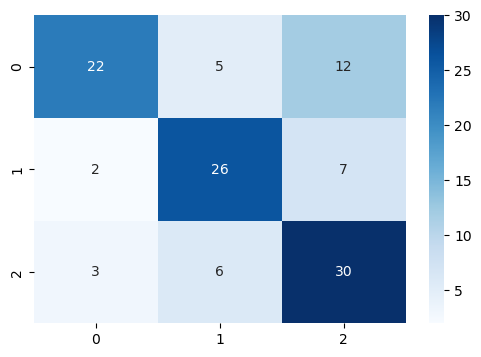

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, cmap="Blues")
plt.show()

0: "Financial"
1: "Healthcare"
2: "Technology"

* Model Financial şirketleri ayırt etmede diğerlerine göre daha iyi
* Healthcare şirketlerini tanımada güçlük çekiyor. Bu şirketleri Technology şirketi demeye meyili.
* Çıkardığımız özelliklere göre Healthcare şirketlerinin Technology şirketlerine benzediği sonucuna ulaşabiliriz.

In [43]:
best_score = f1_score(y_test, svm_preds, average="weighted")
best_score

0.6891034236166981

### Hiperparametre Optimizasyonu

In [46]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(), param_grid, n_jobs=1, verbose=0, return_train_score=False) 
grid.fit(scaled_X_train, y_train) 

GridSearchCV(estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [47]:
print(grid.best_params_) 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.1}
SVC(C=1, gamma=0.1)


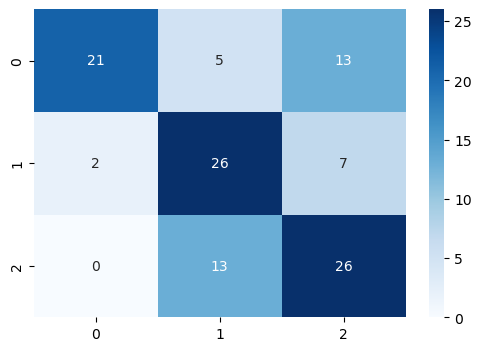

In [48]:
grid_preds = grid.predict(scaled_X_test)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, grid_preds), annot=True, cmap="Blues")
plt.show()

0: "Financial"
1: "Healthcare"
2: "Technology"

In [50]:
f1_score(y_test, grid_preds, average="weighted")

0.6488155137315553

Sebebini bilmediğim bir şekilde, optimum parametreler modelin performansını düşürdü.

### Özellik Kıymetini Belirleme (Feature Importance)

* Buradaki for döngüsüyle her bir özelliği kendi içinde karıştırıp modeli tekrardan eğitiyorum.
* Optimum model ile arasında ne kadar bir fark olduğunu görmek için de modelin f1 skorunu, optimum modelin f1 skorundan çıkarıp kaydediyorum.

In [51]:
score_changes = {}
for col in scaled_X_train.columns:
    
    np.random.seed(0)
    temp_train = copy.deepcopy(scaled_X_train)
    temp_train[col] = np.random.permutation(temp_train[col].values)
    model = SVC()
    model.fit(temp_train, y_train) 
    model_preds = model.predict(scaled_X_test)
    score = f1_score(y_test, model_preds, average="weighted")
    score_changes[col] = round((best_score - score)*100, 3)

Bunları sıraladığım zaman şunu söyleyebiliyoruz:
* *'Close__fft_coefficient__attr_"angle"__coeff_60'* isimli değişken, modelin performansını %5.5 oranında etkiliyormuş.
* Yani bu değişkenin olmayışı, modelin performansını %5.5 oranında düşürüyor.
* Diğer değerlere de bakacak olursak, en kıymetli özelliğin bu olduğunu söyleyebiliriz.
* Her çalıştırmada farklı bir değer gelebilir

In [52]:
dict(reversed(sorted(score_changes.items(), key=lambda item: item[1])))

{'Close__fft_coefficient__attr_"angle"__coeff_23': 4.981,
 'Close__last_location_of_maximum': 2.647,
 'Close__fft_coefficient__attr_"angle"__coeff_15': 2.603,
 'Close__fft_coefficient__attr_"imag"__coeff_16': 2.539,
 'Close__fft_coefficient__attr_"real"__coeff_14': 2.482,
 'Close__fft_coefficient__attr_"angle"__coeff_41': 2.231,
 'Close__last_location_of_minimum': 1.901,
 'Close__fft_coefficient__attr_"angle"__coeff_8': 1.761,
 'Close__fft_coefficient__attr_"angle"__coeff_60': 1.675,
 'Close__fft_coefficient__attr_"angle"__coeff_68': 1.516,
 'Close__fft_coefficient__attr_"real"__coeff_49': 1.16,
 'Close__quantile__q_0.7': 0.817,
 'Close__quantile__q_0.8': 0.805,
 'Close__fft_coefficient__attr_"real"__coeff_51': 0.632,
 'Close__fft_coefficient__attr_"imag"__coeff_23': 0.155,
 'Close__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"var"': 0.036,
 'Close__fft_coefficient__attr_"angle"__coeff_58': -0.048,
 'Close__fft_coefficient__attr_"imag"__coeff_41': -1.127,
 'Close__fft_coeffi

### Real-Estate Şirketlerini Sınıflandırma

Pipeline kullanmamış olsam da fonksiyonel yazmayı tercih ettiğim için, diğer şirketleri test etmek amacıyla çok uzun kodlar yazmaya gerek kalmıyor. Dilerseniz farklı bir sektörde test etmek için aşağıdaki fonksiyonu çağırabilirsiniz. Sadece dosyanın yolunu ve sektör adını typo olmadan vermeniz yeterli olacaktır.

In [53]:
DATA_PATH = 'data/real-estate.csv'
SECTOR = "Real Estate"

In [54]:
def get_custom_data():
    real_estate = pd.read_csv(DATA_PATH)
    real_estate_symbols = list(real_estate.Symbol.values)
    tick_re = get_ticker_data(technology)
    rest_roll = get_rolling_ret(tick_re, 3).dropna()
    tech_ft = get_features(rest_roll, SECTOR)
    tech_ft.to_csv(f"{SECTOR}_roll.csv")

In [62]:
def test_sector():
    file_name = DATA_PATH.split("/")[-1].split(".")[0].replace("-", "_")
    rest_ft = pd.read_csv(f"{file_name}_roll.csv")
    filter_re = rest_ft.filter(items=feats)
    scaled_re = pd.DataFrame(sc.transform(filter_re), columns=filter_re.columns)
    re_preds = svm.predict(scaled_re)
    return list(zip(np.unique(re_preds, return_counts=True)[0], np.unique(re_preds, return_counts=True)[1]))

In [63]:
#get_custom_data()
test_sector()

[('Financial', 13), ('Healthcare', 18), ('Technology', 169)]